# Step 1: Load the Dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_pickle("churn_prediction_v3.pkl")

In [2]:
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,2401,66,Male,0,self_employed,187,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0
1,2648,35,Male,0,self_employed,100000,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0
2,2494,31,Male,0,salaried,146,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0
3,2629,90,Male,1,self_employed,1020,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0
4,1879,42,Male,2,self_employed,1494,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15929 entries, 0 to 15928
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         15929 non-null  int64   
 1   age                             15929 non-null  int64   
 2   gender                          15929 non-null  category
 3   dependents                      15929 non-null  int64   
 4   occupation                      15929 non-null  category
 5   city                            15929 non-null  category
 6   customer_nw_category            15929 non-null  category
 7   branch_code                     15929 non-null  category
 8   current_balance                 15929 non-null  float64 
 9   previous_month_end_balance      15929 non-null  float64 
 10  average_monthly_balance_prevQ   15929 non-null  float64 
 11  average_monthly_balance_prevQ2  15929 non-null  float64 
 12  current_month_cred

In [4]:
# Steps for Model Building
# 0. Convert your Business problem into a Data Problem
# 1. Load the dataset
# 2. Exploratory Data Analysis:
# 3. Bare minimum data cleaning (e.g. missing value imputation) & 
# preprocessing (e.g. Encoding the cat. variables)

# 4. Create Baseline models

# 5. Data Polishing/Refinement: e.g. outlier treatment, scaling the num. features,
# Feature engineering, feature selection, feature transformation, etc.

# ===> Data is FInalized!!
# 6. Compare and Select the best model(s) for "tuning" 

# 7. Hyper-parameter tuning / Model Refinement

# 8. Re-train you final model on the entire data, one last time!

# 9. Save the model (pickelize)

# 10. Share/Deploy the model

# y = f(X)

# Model = Algo(Data)


# Step 3: Data Cleaning & Basic PRe-processing

In [5]:
categorical_cols = df.dtypes[df.dtypes == 'category'].index  # identifying the categorical variable
categorical_cols

Index(['gender', 'occupation', 'city', 'customer_nw_category', 'branch_code',
       'churn'],
      dtype='object')

In [6]:
for col in categorical_cols:  # list the number of unique values in these cat. columns
    print(col, ":", df[col].nunique())

gender : 2
occupation : 5
city : 1288
customer_nw_category : 3
branch_code : 2806
churn : 2


In [7]:
df.drop("city", axis=1, inplace=True)          # Dropping the columns, as it has just too many unique values
df.drop( 'branch_code', axis=1, inplace=True)  # Dropping the columns, as it has just too many unique values

In [8]:
df['gender'] = df['gender'].map({'Male':0, 'Female':1})  # Label Encoding the gender col. This can also be One-hot encoded

In [9]:
pd.get_dummies(df['occupation'], drop_first=True)   # OHE the occupation

,retired,salaried,self_employed,student
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
15924,0,1,0,0
15925,0,0,1,0
15926,0,1,0,0
15927,0,0,1,0


In [10]:
nominal_cols = ['occupation', 'customer_nw_category'] # Selecting out the columns for OHE    #  'city', 

In [11]:
df_new = pd.get_dummies(df, columns=nominal_cols) # One-Hot encoding the Nominal columns

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15929 entries, 0 to 15928
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         15929 non-null  int64   
 1   age                             15929 non-null  int64   
 2   gender                          15929 non-null  category
 3   dependents                      15929 non-null  int64   
 4   current_balance                 15929 non-null  float64 
 5   previous_month_end_balance      15929 non-null  float64 
 6   average_monthly_balance_prevQ   15929 non-null  float64 
 7   average_monthly_balance_prevQ2  15929 non-null  float64 
 8   current_month_credit            15929 non-null  float64 
 9   previous_month_credit           15929 non-null  float64 
 10  current_month_debit             15929 non-null  float64 
 11  previous_month_debit            15929 non-null  float64 
 12  current_month_bala

In [13]:
# df_new[df_new.dtypes[df_new.dtypes == "bool"].index] = df_new[df_new.dtypes[df_new.dtypes == "bool"].index].astype("int")

In [14]:
df_new.to_pickle("cleaned_churn_dataset.pkl")

## Step 4: Create Baseline Model

In [15]:
X = df_new.drop('churn', axis=1)  # Features matrix
y = df_new['churn']   # Target variable for Regression

In [16]:
X.shape

(15929, 22)

In [17]:
# Split your data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((12743, 22), (3186, 22))

In [18]:
X_train.head()

,vintage,age,gender,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,current_month_balance,previous_month_balance,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
6682,2110,50,1,0,987.17,487.17,1594.23,1984.86,500.13,428.70,...,987.17,1864.83,0,0,0,1,0,1,0,0
1665,2617,62,0,1,10579.41,8357.16,4367.52,1632.61,2244.06,7572.83,...,10329.55,1991.74,0,0,1,0,0,0,0,1
13644,2531,62,0,2,1598.32,2108.68,5724.23,1995.06,0.60,5714.89,...,1806.62,7287.87,0,0,0,1,0,0,1,0
7142,2610,64,1,2,1890.72,1754.15,1718.20,1581.80,142.89,0.03,...,1958.01,1738.00,0,0,0,1,0,0,1,0
2582,2544,27,0,0,9223.24,9223.24,8639.59,14710.91,0.34,37478.57,...,9223.24,3660.20,0,0,0,0,1,0,1,0


In [19]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver="liblinear")  # "untrained" model
LR.fit(X_train, y_train)  # model is trained now  >>> fitting means model training here.
# Always fit your model on the training set

LogisticRegression(solver='liblinear')

In [20]:
LR.predict(X_test)   # predictions of the model on the test set

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
LR.predict_proba(X_test)

array([[0.77187053, 0.22812947],
       [0.8031153 , 0.1968847 ],
       [0.63682422, 0.36317578],
       ...,
       [0.83008725, 0.16991275],
       [0.8021374 , 0.1978626 ],
       [0.86053746, 0.13946254]])

In [22]:
LR.score(X_train, y_train)   # R^2 score of the model on the training set

0.8230401004473044

In [23]:
LR.score(X_test, y_test)   # R^2 score of the model on the TEST set

0.8195229127432517

In [24]:
LR.coef_  # Model Coiefficients / parameters of the model

array([[-4.77214765e-04, -5.82742418e-03, -1.30614209e-04,
         3.65199940e-04, -1.76033409e-04, -6.27617540e-06,
         2.14944701e-04, -1.06148097e-05, -7.91440775e-06,
        -1.66633027e-06,  7.33116488e-06,  3.10679242e-06,
        -8.57215300e-06, -4.89964914e-05, -8.22277425e-06,
        -7.75842373e-05, -8.49049373e-05,  1.87351662e-04,
        -8.13376827e-05, -2.07141513e-05, -1.94895729e-04,
         1.50911911e-04]])

In [25]:
LR.intercept_  # the final intercept term

array([-6.46979697e-05])

In [26]:
# Set the display option
pd.set_option('display.float_format', '{:.2f}'.format)

In [27]:
np.array((X.columns))

array(['vintage', 'age', 'gender', 'dependents', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'occupation_company',
       'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student',
       'customer_nw_category_1', 'customer_nw_category_2',
       'customer_nw_category_3'], dtype=object)

In [28]:
model_coef = pd.DataFrame(LR.coef_.reshape(-1, 1), index=np.array((X.columns)),  columns=['Model Coefficients'])
model_coef*1e6

,Model Coefficients
vintage,-477.21
age,-5827.42
gender,-130.61
dependents,365.20
current_balance,-176.03
previous_month_end_balance,-6.28
average_monthly_balance_prevQ,214.94
average_monthly_balance_prevQ2,-10.61
current_month_credit,-7.91
previous_month_credit,-1.67


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [30]:
y_pred = LR.predict(X_test)
accuracy_score(y_pred,y_test)

0.8195229127432517

In [31]:
confusion_matrix(y_test, y_pred)

array([[2565,    8],
       [ 567,   46]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred) ) #  target_names=["No Churn", "Churn"]) )

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      2573
         1.0       0.85      0.08      0.14       613

    accuracy                           0.82      3186
   macro avg       0.84      0.54      0.52      3186
weighted avg       0.83      0.82      0.75      3186



In [33]:
f1_score(y_test, y_pred)

0.13793103448275862

In [34]:
y.value_counts(normalize=True)

0.0   0.81
1.0   0.19
Name: churn, dtype: float64

In [35]:
# Start crossvalidting each of these models
# Apply Standard scaler and see if the results get better  >> using pippelines
# Hyprerparam Tune K of Decision Tree  >> using pippelines


# Statistical Validation of the LR Model

In [39]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)  # Adding a constant for the intercept
model = sm.Logit(y_train, X_train_sm).fit()
print(model.summary())

C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [40]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data

C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,vintage,1.00
1,age,1.56
2,gender,1.09
3,dependents,1.05
4,current_balance,70.98
5,previous_month_end_balance,41.01
6,average_monthly_balance_prevQ,510.81
7,average_monthly_balance_prevQ2,3.98
8,current_month_credit,5.14
9,previous_month_credit,3.72


In [41]:
X_new = X.drop("average_monthly_balance_prevQ", axis=1)
X_new = X_new.drop("previous_month_balance", axis=1)
X_new = X_new.drop("current_month_balance", axis=1)

In [42]:
X_new.columns

Index(['vintage', 'age', 'gender', 'dependents', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'occupation_company', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed', 'occupation_student',
       'customer_nw_category_1', 'customer_nw_category_2',
       'customer_nw_category_3'],
      dtype='object')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((12743, 19), (3186, 19))

### Recalculate VIF After dropping the features

In [44]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data

C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,vintage,1.00
1,age,1.56
2,gender,1.09
3,dependents,1.05
4,current_balance,21.50
5,previous_month_end_balance,21.84
6,average_monthly_balance_prevQ2,2.16
7,current_month_credit,4.85
8,previous_month_credit,3.46
9,current_month_debit,4.16


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
X_train_sm = sm.add_constant(X_train)  # Adding a constant for the intercept
model = sm.Logit(y_train, X_train_sm).fit()
print(model.summary())

         Current function value: 0.463025
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                12743
Model:                          Logit   Df Residuals:                    12725
Method:                           MLE   Df Model:                           17
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                 0.03699
Time:                        14:28:27   Log-Likelihood:                -5900.3
converged:                      False   LL-Null:                       -6127.0
Covariance Type:            nonrobust   LLR p-value:                 1.262e-85
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.6546   1.24e+06  -3.76e-06      1.000   -2.43e+06    2.43e+06
vinta

C:\Users\Prashant\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Building a decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=3, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

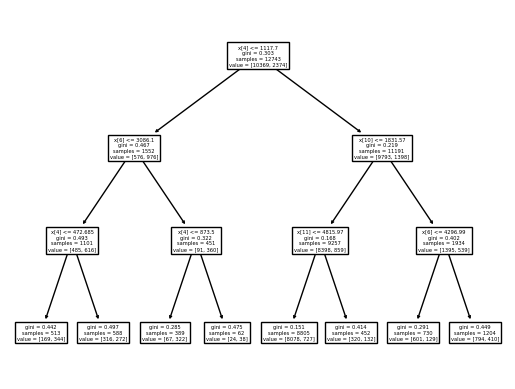

In [55]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(tree_model)
#plt.savefig('images/03_21_1.pdf')
plt.show()

In [56]:
# !pip install pydotplus

list(X_train.columns)

['vintage',
 'age',
 'gender',
 'dependents',
 'current_balance',
 'previous_month_end_balance',
 'average_monthly_balance_prevQ',
 'average_monthly_balance_prevQ2',
 'current_month_credit',
 'previous_month_credit',
 'current_month_debit',
 'previous_month_debit',
 'current_month_balance',
 'previous_month_balance',
 'occupation_company',
 'occupation_retired',
 'occupation_salaried',
 'occupation_self_employed',
 'occupation_student',
 'customer_nw_category_1',
 'customer_nw_category_2',
 'customer_nw_category_3']

In [57]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['No Churn', 
                                        'Churn'],
                           feature_names=list(X_train.columns),
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

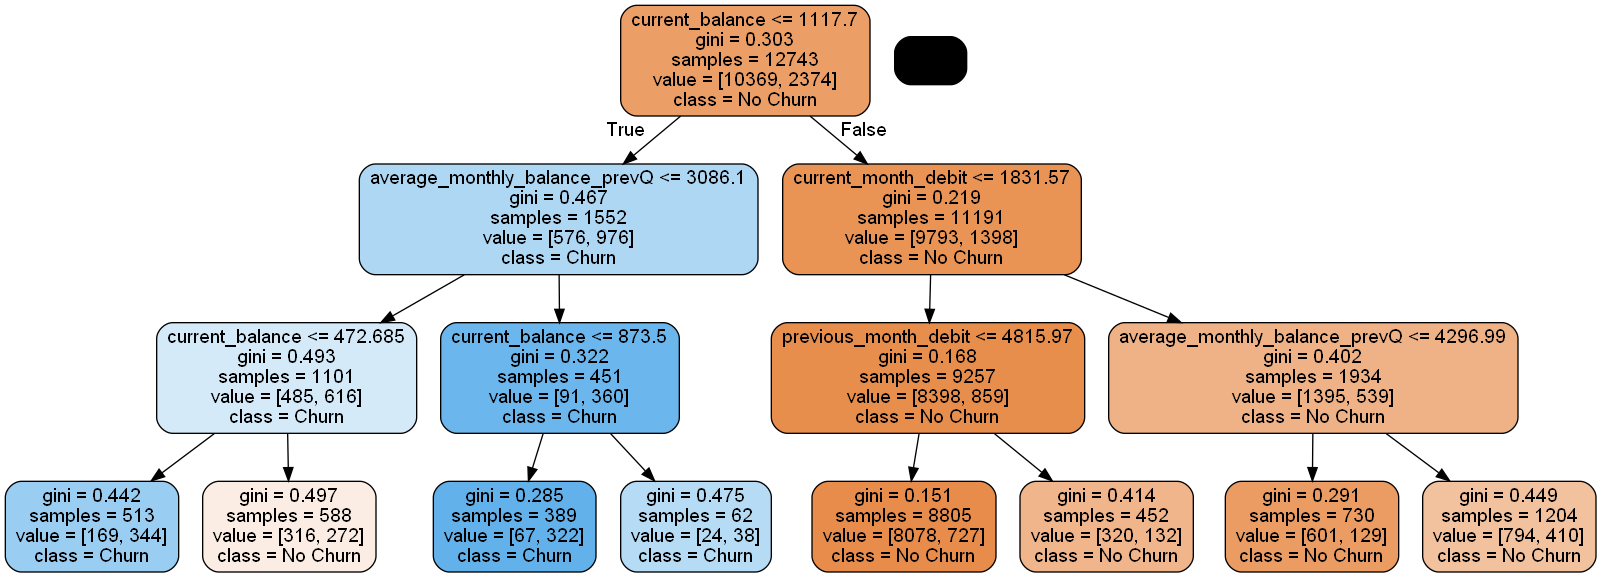

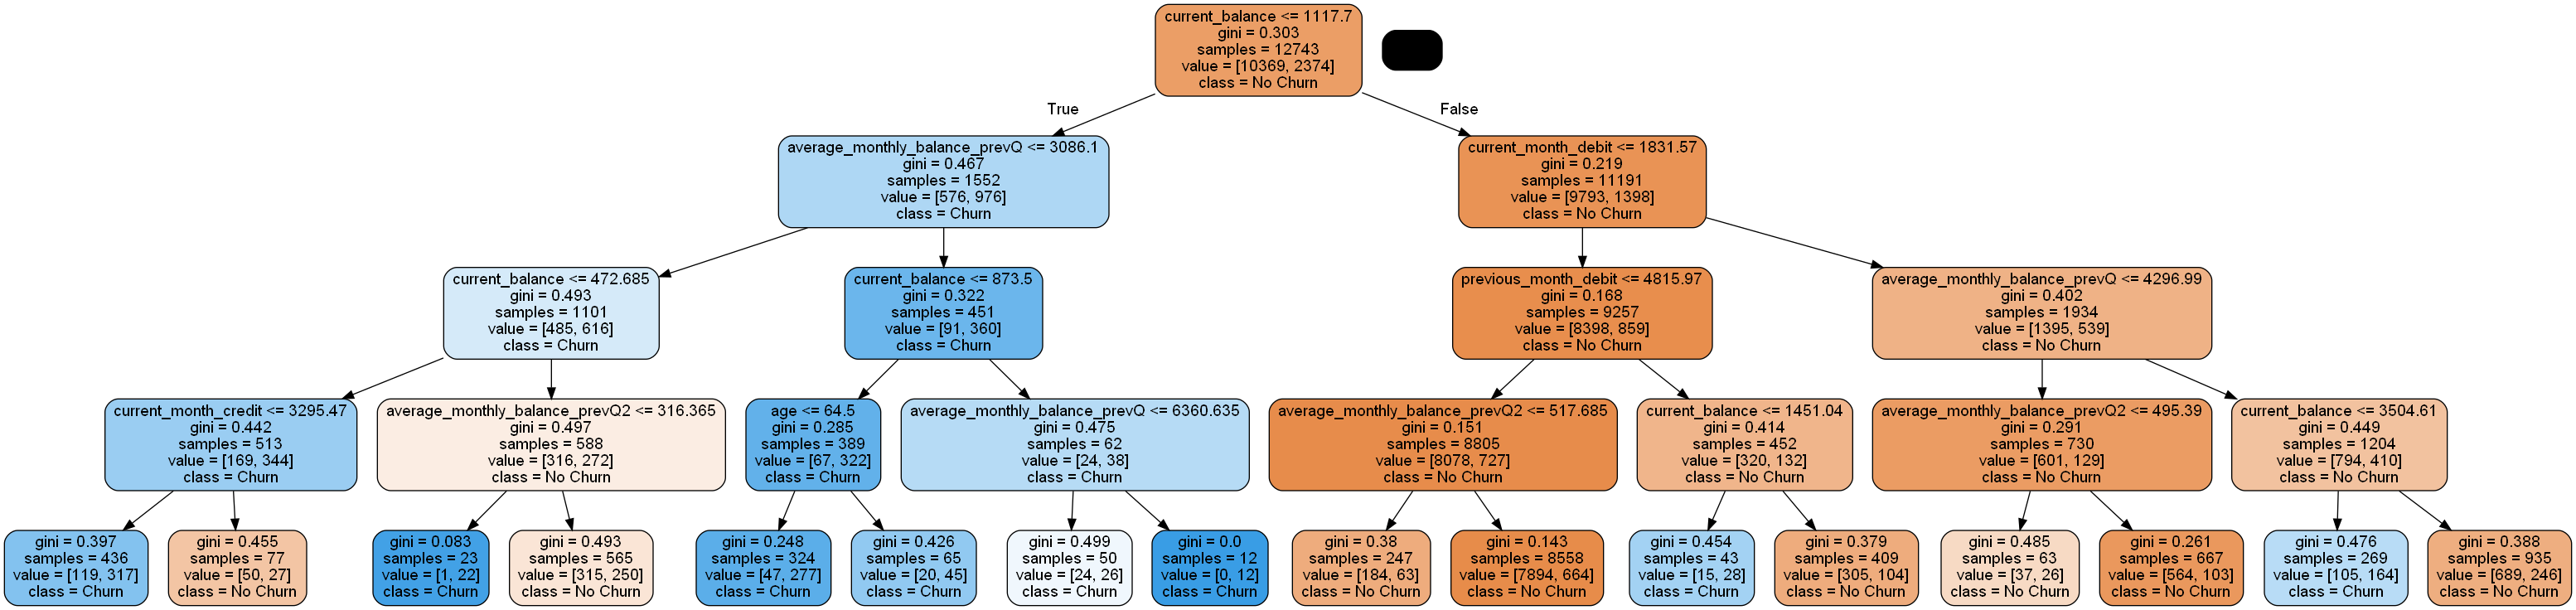

# Step 5: Try out other Algorithms


In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_validate, StratifiedKFold

In [37]:
X = df_new.drop('churn', axis=1)  # Features matrix
y = df_new['churn']   # Target variable for Regression

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((12743, 22), (3186, 22))

In [39]:
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits,shuffle=True, random_state=101)  # >> shuffler & spliiter 

In [55]:
LR = LogisticRegression(solver="liblinear", class_weight='balanced')  # "untrained" model
LR.fit(X_train, y_train)  # model is trained now  >>> fitting means model training here.


LogisticRegression(class_weight='balanced', solver='liblinear')

In [56]:
f1_score(y_test, LR.predict(X_test))

0.5144781144781145

In [57]:
y_pred = LR.predict(X_test)
confusion_matrix(y_test, y_pred) 

array([[2083,  490],
       [ 231,  382]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred) ) #  target_names=["No Churn", "Churn"]) )

              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      2573
         1.0       0.44      0.62      0.51       613

    accuracy                           0.77      3186
   macro avg       0.67      0.72      0.68      3186
weighted avg       0.81      0.77      0.79      3186



# Trying all other algos

In [119]:
### Create 6 baseline models!!
models = [] 
models.append(('LogReg_L2',  LogisticRegression(solver="lbfgs", max_iter=500, C = 1, class_weight='balanced', random_state=100)))
models.append(('LogReg_L1',  LogisticRegression(penalty = 'l1', C = 0.01, solver="liblinear", \
                                                class_weight='balanced', random_state=100)))

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=100)))
models.append(('GaussianNB', GaussianNB()))

# models.append(('SVM', SVC(class_weight='balanced', random_state=100)) )

models # we have created a list of models which will be tried!!

[('LogReg_L2',
  LogisticRegression(C=1, class_weight='balanced', max_iter=500, random_state=100)),
 ('LogReg_L1',
  LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                     random_state=100, solver='liblinear')),
 ('KNN', KNeighborsClassifier()),
 ('DT',
  DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=100)),
 ('GaussianNB', GaussianNB())]

In [120]:
cv_results = []
n_splits = 5
mean_train_score = []
test_scores = []
names = []

# going to cross-validate all the 5 models
for name, model in models:
    results = cross_validate(model, X.values, y, return_train_score=True, cv=kfold, scoring="f1")  # 'accuracy'
    cv_results.append(results)
    test_scores.append(results['test_score'] ) 
    mean_train_score.append(results['train_score'].mean().round(3) )
    names.append(name)
    print(name, ".... done!")

LogReg_L2 .... done!
LogReg_L1 .... done!
KNN .... done!
DT .... done!
GaussianNB .... done!


In [121]:
results_df = pd.DataFrame(test_scores, index=names, columns='CV1 CV2 CV3 CV4 CV5'.split() )
results_df['CV Mean'] = np.round(results_df.iloc[:,0:n_splits].mean(axis=1), 4)
results_df['CV Std Dev'] = np.round(results_df.iloc[:,0:n_splits].std(axis=1), 4)

results_df['Mean_Train_Score'] = mean_train_score

results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev,Mean_Train_Score
LogReg_L2,58.52,57.33,55.46,57.59,56.51,57.08,1.15,57.20
LogReg_L1,58.64,56.08,54.16,57.23,56.93,56.61,1.65,57.00
DT,54.17,51.26,51.44,53.45,53.17,52.70,1.29,53.50
KNN,51.84,47.82,48.70,49.74,46.60,48.94,1.99,61.30
GaussianNB,31.11,4.24,32.02,31.23,31.07,25.93,12.14,26.20


#  Standardize the Data & Re-model

In [89]:
#%% Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []  # i am creating a list of pipelines!!

# pipelines.append(('ScaledLR', make_pipleline(StandardScaler(), LinearRegression()  )   )   ) 
model1 = LogisticRegression(solver="liblinear", C = 0.01, class_weight='balanced', random_state=100) 
pipelines.append(('Scaled_LogReg', Pipeline([('Scaler', StandardScaler()), ('LogReg_L2', model1)])   ))

model2 = LogisticRegression(penalty = 'l1', C = 0.01, solver="liblinear", class_weight='balanced', random_state=100)
pipelines.append(('Scaled_LogReg_L1', Pipeline([('Scaler', StandardScaler()), ('LogReg_L1', model2)])   ))

pipelines.append(('Scaled_KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))

pipelines.append(('Scaled_DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier(class_weight='balanced', random_state=100))])))
# pipelines.append(('Scaled_SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(class_weight='balanced', random_state=100))])))  #
pipelines

[('Scaled_LogReg',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('LogReg',
                   LogisticRegression(C=0.01, class_weight='balanced',
                                      random_state=100, solver='liblinear'))])),
 ('Scaled_LogReg_L1',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('LogReg_L1',
                   LogisticRegression(C=0.01, class_weight='balanced',
                                      penalty='l1', random_state=100,
                                      solver='liblinear'))])),
 ('Scaled_KNN',
  Pipeline(steps=[('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])),
 ('Scaled_DT',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('DT',
                   DecisionTreeClassifier(class_weight='balanced',
                                          random_state=100))]))]

In [85]:
cv_results = []
n_splits = 5
mean_train_score = []
test_scores = []
model_names = []

# going to cross-validate all the 5 models
for name, pipeline in pipelines:
    results = cross_validate(pipeline, X.values, y, return_train_score=True, cv=kfold, scoring="f1")
    cv_results.append(results)
    test_scores.append(results['test_score'] ) 
    mean_train_score.append(results['train_score'].mean().round(3) )
    model_names.append(pipeline.steps[-1][0])

    model_names.append(name)
    print(name, ".... done!")

In [87]:
model_names

['LogReg', 'LogReg_L1', 'KNN', 'DT', 'SVM']

In [88]:
results_df = pd.DataFrame(test_scores, index=model_names, columns='CV1 CV2 CV3 CV4 CV5'.split() )
results_df['CV Mean'] = np.round(results_df.iloc[:,0:n_splits].mean(axis=1), 4)
results_df['CV Std Dev'] = np.round(results_df.iloc[:,0:n_splits].std(axis=1), 4)

results_df['Mean_Train_Score'] = mean_train_score

results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev,Mean_Train_Score
LogReg,50.89,47.42,48.46,49.40,48.67,48.97,1.29,49.10
SVM,42.22,50.52,41.95,44.43,44.38,44.70,3.45,48.20
DT,43.83,42.64,44.56,44.82,39.38,43.05,2.22,100.00
LogReg_L1,37.03,41.49,39.07,36.69,38.95,38.65,1.92,39.10
KNN,14.29,17.89,15.43,15.12,14.15,15.37,1.51,32.50
